# Self-Training Implementation in Python

#### Self-Training
Self-Training is a semi-supervised learning approach that leverages a small labeled dataset alongside a larger unlabeled dataset. The model is initially trained on labeled data, and then it makes predictions on unlabeled data. The confident predictions (those with high certainty) are then added to the labeled dataset and the process is repeated toimprove the model.

Accuracy: 0.9066666666666666


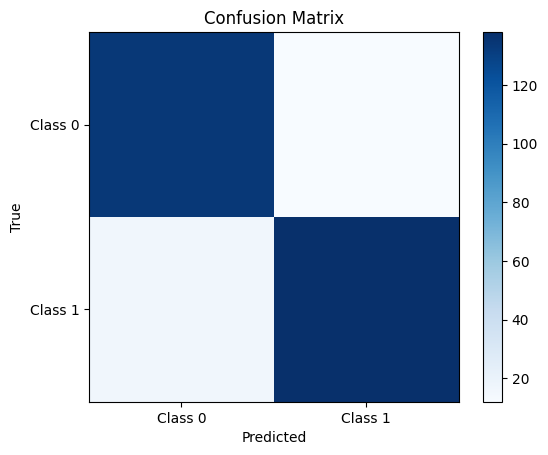

In [6]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

# initialise and train the model with labeled data
model = RandomForestClassifier(random_state=42)
model.fit(X_labeled, y_labeled)

# perform self-training on unlabeled data
for _ in range(5): # repeat the process 5 times for iterative self-training
    # predict probabilities on the unlabeled data
    probs = model.predict_proba(X_unlabeled)
    high_confidence_idx = np.where(np.max(probs, axis=1) > 0.9)[0] # select samples with high confidence predictions

    # add high confidence predictions to the labeled data
    X_labeled = np.vstack([X_labeled, X_unlabeled[high_confidence_idx]])
    y_labeled = np.hstack([y_labeled, y_unlabeled[high_confidence_idx]])

    # remove confident samples from unlabeled dataset
    X_unlabeled = np.delete(X_unlabeled, high_confidence_idx, axis=0)

    # retrain the model on the new labeled data
    model.fit(X_labeled, y_labeled)

# final evaluation on a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Class 0", "Class 1"])
plt.yticks(tick_marks, ["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()